In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction import image
from sklearn.metrics import pairwise, silhouette_score
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

/om/user/jakubk/jakub_env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


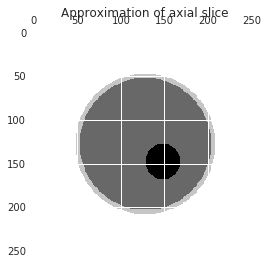

In [3]:
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html

def get_synthetic_slice(dim, with_tumor=False):
    """Return array with shape (dim, dim) that approximates skull, brain, 
    and tumor.
    
    dim: length of one side of the square array.
    with_tumor: whether tumor should be present in output array.
    """
    l = dim
    x, y = np.indices((dim, dim))
    # Define centers of circles and their radii.
    skull_cen = (dim // 2, dim // 2)
    brain_cen = skull_cen
    tumor_cen = (dim // 2 + 20, dim // 2 + 20)
    skull_rad, brain_rad, tumor_rad = 80, 75, 20

    # Create boolean arrays to represent brain and tumor.
    skull = (x - skull_cen[0]) ** 2 + (y - skull_cen[1]) ** 2 < skull_rad ** 2
    brain = (x - brain_cen[0]) ** 2 + (y - brain_cen[1]) ** 2 < brain_rad ** 2
    tumor = (x - tumor_cen[0]) ** 2 + (y - tumor_cen[1]) ** 2 < tumor_rad ** 2

    # Convert to int32 so addition will lead to unique classes.
    skull = skull.astype(np.int32)
    brain = brain.astype(np.int32)
    tumor = tumor.astype(np.int32)

    # Add together to make complete image.
    if with_tumor:
        return (skull + brain + tumor) * 1000
    else:
        return (skull + brain) * 1000

img = get_synthetic_slice(256, with_tumor=True)
plt.matshow(img)
plt.title("Approximation of axial slice")

In [4]:
img_flat = img.flatten().reshape(-1, 1)
y = (img_flat / 1000).flatten()

print(img_flat.shape, y.shape)

((65536, 1), (65536,))


In [5]:
# Perform t-SNE.
X_tsne = TSNE(perplexity=30, learning_rate=500.).fit_transform(img_flat)

In [ ]:
palette = np.array(sns.color_palette("hls", 2))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=palette[y.astype(np.int)])

In [ ]:
# Compute similarity matrix.
sim = pairwise.cosine_similarity(img)